In [3]:
#SARSA
import numpy as np
import matplotlib.pyplot as plt
import problem1_bonus as mz_b
maze_mat = np.array([
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 1, 1, 1],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 1, 2, 0, 0]])
start_pos = (0,0)
minotaur_pos = (6,5)
key_pos = (0,7)
# SARSA
env = mz_b.Maze_bonus(maze_mat,None,False,False,False)
n_states  = env.n_states
n_actions = env.n_actions
# Finite horizon
no_episodes = 50000
t_horizon = 300
alpha = 2/3
gamma = 45/50
n=10000
epsilon_list = [0.1,0.2]
start  = ((0, 0),(6, 5),0)
value_mat = [[],[]]
probability_list =[]
Q_init = np.zeros((n_states, n_actions))
# Solve the MDP problem with dynamic programming 
Q, policy, value_list_1 = mz_b.SARSA(env,Q_init,start,no_episodes,t_horizon,alpha,gamma,epsilon_list[0])
success = 0
for _ in range(n):
    path = env.simulate(start, policy, 'ValIter')
    if path[-1][0] == (6, 5) and path[-1][2]==1:
        success += 1
probability_list.append(success/n)
print("The survice rate is: "+str(100*success/n)+"%")
value_mat[0] = value_list_1
Q, policy1, value_list_2 = mz_b.SARSA(env,Q_init,start,no_episodes,t_horizon,alpha,gamma,epsilon_list[1])
success = 0
for _ in range(n):
    path = env.simulate(start, policy, 'ValIter')
    if path[-1][0] == (6, 5) and path[-1][2]==1:
        success += 1
probability_list.append(success/n)
print("The survice rate is: "+str(100*success/n)+"%")
value_mat[1] = value_list_2
#print("Simulation done")
#method = 'ValIter'
#path = env.simulate(start, policy1, method)
# Show the shortest path 
#print(path)
#mz_b.animate_solution(maze_mat, path)

Training: 100%|██████████| 50000/50000 [00:24<00:00, 2057.80episode/s]


The survice rate is: 33.7%


Training: 100%|██████████| 50000/50000 [00:25<00:00, 1930.11episode/s]


The survice rate is: 32.62%


Training: 100%|██████████| 50000/50000 [02:11<00:00, 380.95episode/s]


The survice rate is: 0.0%
Simulation done


Training: 100%|██████████| 50000/50000 [02:17<00:00, 362.79episode/s]


The survice rate is: 0.0%
Simulation done


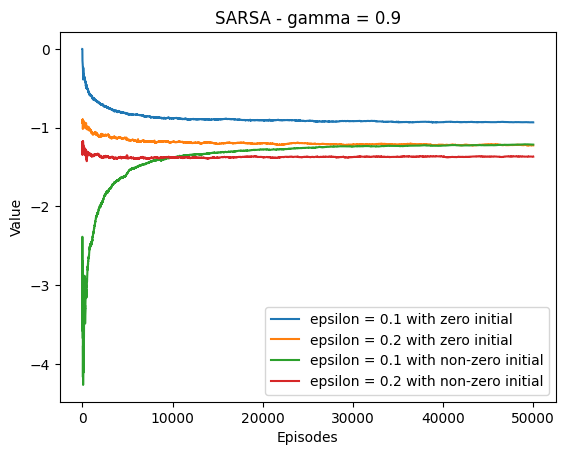

In [2]:
#random Q_init
Q_init = -np.random.uniform(1, 20, (n_states, n_actions))
for s in range(n_states):
    if env.states[s][0] == env.states[s][1] or (env.maze[env.states[s][0]]==2 and env.states[s][2] == 1):
        Q_init[s,:]=np.zeros(n_actions)
for epsilon in epsilon_list:
    value_list = []
    Q, policy, value_list = mz_b.SARSA(env,Q_init,start,no_episodes,t_horizon,alpha,gamma,epsilon)
    value_mat.append(value_list)
    success = 0
    for _ in range(n):
        path = env.simulate(start, policy, 'ValIter')
        if path[-1][0] == (6, 5) and path[-1][2]==1:
            success += 1
    probability_list.append(success/n)
    print("The survice rate is: "+str(100*success/n)+"%")
    print("Simulation done")
plt.plot(value_mat[0])
plt.plot(value_mat[1])
plt.plot(value_mat[2])
plt.plot(value_mat[3])
plt.ylabel('Value')
plt.xlabel('Episodes')
plt.title('SARSA - gamma = '+str(gamma))
plt.legend(['epsilon = 0.1 with zero initial', 'epsilon = 0.2 with zero initial',
            'epsilon = 0.1 with non-zero initial', 'epsilon = 0.2 with non-zero initial'])
plt.show()

Training: 100%|██████████| 50000/50000 [00:19<00:00, 2587.46episode/s]


The survice rate is: 32.62%


Training: 100%|██████████| 50000/50000 [00:18<00:00, 2632.97episode/s]


The survice rate is: 32.81%


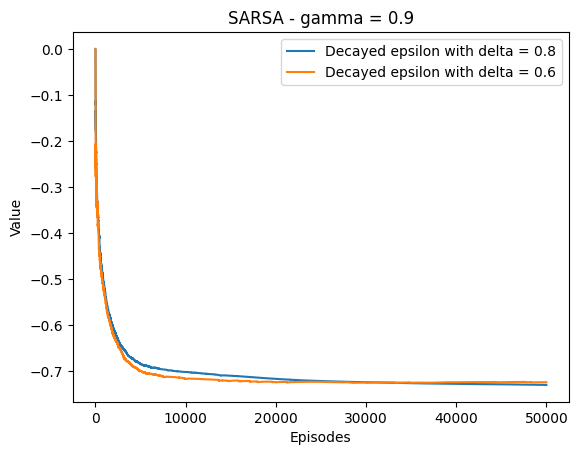

In [3]:
#SARSA with decay
#SARSA
import numpy as np
import matplotlib.pyplot as plt
import problem1_bonus as mz_b
maze_mat = np.array([
                [0, 0, 1, 0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 1, 0, 0, 1, 1, 1],
                [0, 0, 1, 0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0],
                [0, 1, 1, 1, 1, 1, 1, 0],
                [0, 0, 0, 0, 1, 2, 0, 0]])
start_pos = (0,0)
minotaur_pos = (6,5)
key_pos = (0,7)
# SARSA
env = mz_b.Maze_bonus(maze_mat,None,False,False,False)
n_states  = env.n_states
n_actions = env.n_actions
# Finite horizon
no_episodes = 50000
t_horizon = 300
alpha = 2/3
gamma = 45/50
delta_list = [0.8,0.6]
start  = ((0, 0),(6, 5),0)
value_mat = [[],[]]
Q_init = np.zeros((n_states, n_actions))
# Solve the MDP problem with dynamic programming 
Q, policy, value_list_1 = mz_b.SARSA_with_decay(env,Q_init,start,no_episodes,t_horizon,alpha,gamma,delta_list[0])
value_mat[0] = value_list_1
success = 0
for _ in range(n):
    path = env.simulate(start, policy, 'ValIter')
    if path[-1][0] == (6, 5) and path[-1][2]==1:
        success += 1
probability_list.append(success/n)
print("The survice rate is: "+str(100*success/n)+"%")
Q_init = np.zeros((n_states, n_actions))
Q, policy, value_list_2 = mz_b.SARSA_with_decay(env,Q_init,start,no_episodes,t_horizon,alpha,gamma,delta_list[1])
value_mat[1]= value_list_2
success = 0
for _ in range(n):
    path = env.simulate(start, policy, 'ValIter')
    if path[-1][0] == (6, 5) and path[-1][2]==1:
        success += 1
probability_list.append(success/n)
print("The survice rate is: "+str(100*success/n)+"%")

plt.plot(value_mat[0])
plt.plot(value_mat[1])
plt.ylabel('Value')
plt.xlabel('Episodes')
plt.title('SARSA - gamma = '+str(gamma))
plt.legend(['Decayed epsilon with delta = '+str(delta_list[0]), 'Decayed epsilon with delta = '+str(delta_list[1])])
plt.show()
